In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Input,Dropout,Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [2]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() 
#loading data

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
train_images,test_images=train_images/255,test_images/255

In [5]:
def visualize_image():
  plt.figure(figsize=(10,10))
  for i in range(14):
    plt.subplot(4,4,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

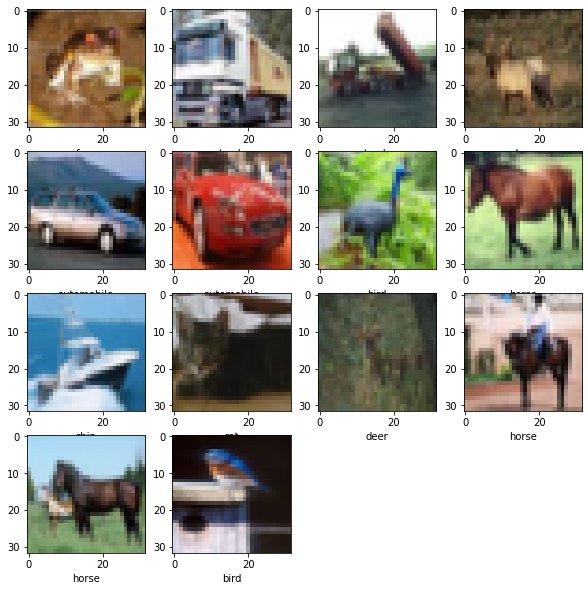

In [6]:
visualize_image()

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
def build_model(train_X,test_X,train_y,test_y):
  i=Input(shape=train_X[0].shape)
  x=Conv2D(32,(3,3),strides=(1,1),padding="same",activation="relu")(i)
  x=Conv2D(64,(3,3),strides=(1,1),padding="same",activation="relu")(x)
  x=Flatten()(x)
  x=Dropout(0.2)(x)
  x=Dense(512,activation="relu")(x)
  x=Dropout(0.2)(x)
  x=Dense(512,activation="softmax")(x)
  model = Model(i,x)
  return model

In [10]:
model=build_model(train_images,test_images, train_labels,test_labels)
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
r = model.fit(train_images,
              train_labels,
              validation_data=(test_images,
                               test_labels),
              epochs=10)


Epoch 1/10
1563/1563 [==============================] - 56s 28ms/step - loss: 1.3767 - accuracy: 0.5113 - val_loss: 1.0855 - val_accuracy: 0.6155
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9521 - accuracy: 0.6645 - val_loss: 1.0180 - val_accuracy: 0.6468
Epoch 3/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6866 - accuracy: 0.7587 - val_loss: 0.9800 - val_accuracy: 0.6659
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4406 - accuracy: 0.8467 - val_loss: 1.0244 - val_accuracy: 0.6742
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.2699 - accuracy: 0.9066 - val_loss: 1.2906 - val_accuracy: 0.6649
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.1822 - accuracy: 0.9386 - val_loss: 1.3999 - val_accuracy: 0.6767
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1412 - accuracy: 0.9521 - val_loss: 1.6978 -

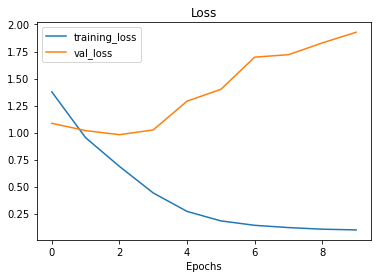

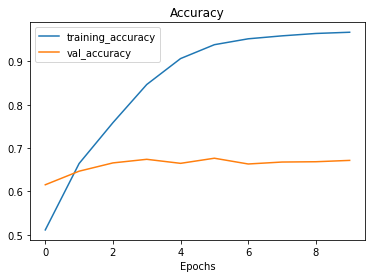

In [11]:
def plot_loss_curves(history):

  loss = r.history['loss']
  val_loss = r.history['val_loss']

  accuracy = r.history['accuracy']
  val_accuracy = r.history['val_accuracy']

  epochs = range(len(r.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
plot_loss_curves(r)